In [1]:
from spks import *
import numpy as np
from labdata.schema import *

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.rcParams.update({'font.size': 16})

[2024-05-14 22:01:02,430][INFO]: Connecting mmelin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[2024-05-14 22:01:02,787][INFO]: Connected mmelin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306


In [2]:
# Grab mice/probes with similar implantation trajectories
#TODO: ADD JC123
SAVEPATH = Path(r'/home/mmelin/chronic_manuscript_figures')
SUBJECTS = ['MM008','MM012','MM013','MM018','JC142','JC162']
SUBJECTS = ['MM008','MM012','MM013','MM018','JC142','JC162']
HEAD_FIXED_SUBJECTS = ['MM012','MM013','MM018']
FREELY_MOVING_SUBJECTS = ['JC142','JC162']
KS_PARAM_SET = 5
UNIT_CRITERIA_SET = 1

In [3]:
def create_unit_count_dataframe(subjects,ks_param_set,unit_criteria_set):
    dat = pd.DataFrame()
    for s in subjects:
        unit_counts = Session() * UnitCount() * Procedure() & dict(subject_name=s,
                                                                   procedure_type='chronic implant',
                                                                   parameter_set_num=ks_param_set,
                                                                   unit_criteria_id=unit_criteria_set,)
        subject_data = unit_counts.proj('all','sua','mua','probe_num',days_from_implant='DATEDIFF(session_datetime,procedure_datetime)').fetch(format='frame')
        subject_data = subject_data.reset_index().drop_duplicates(subset=['days_from_implant','probe_num'])
        dat = pd.concat([dat,subject_data])

    dat = dat.reset_index()
    dat = dat[dat.days_from_implant > 0] # FIXME: TEMPORARY
    return dat

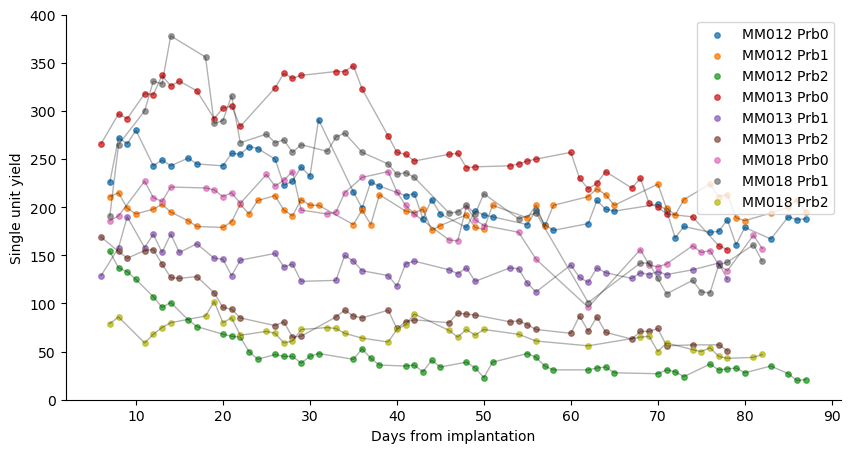

In [4]:
dat = create_unit_count_dataframe(HEAD_FIXED_SUBJECTS,KS_PARAM_SET,UNIT_CRITERIA_SET)

fig,ax = plt.subplots(figsize=(10,5))
for (sub,p_num),p_data in dat.groupby(['subject_name','probe_num']):
    plt.plot(p_data.days_from_implant, p_data.sua, color='black',linewidth=1, alpha=.3)
    plt.scatter(p_data.days_from_implant, p_data.sua, label=f'{sub} Prb{p_num}', s=15, alpha=.8)

plt.ylim((0,400))
plt.xlabel('Days from implantation')
plt.ylabel('Single unit yield')
plt.legend()
plt.gca().spines[['right', 'top']].set_visible(False)
plt.savefig(SAVEPATH / 'single_unit_stability_head_fixed.pdf', format='pdf', dpi=300)
plt.show()

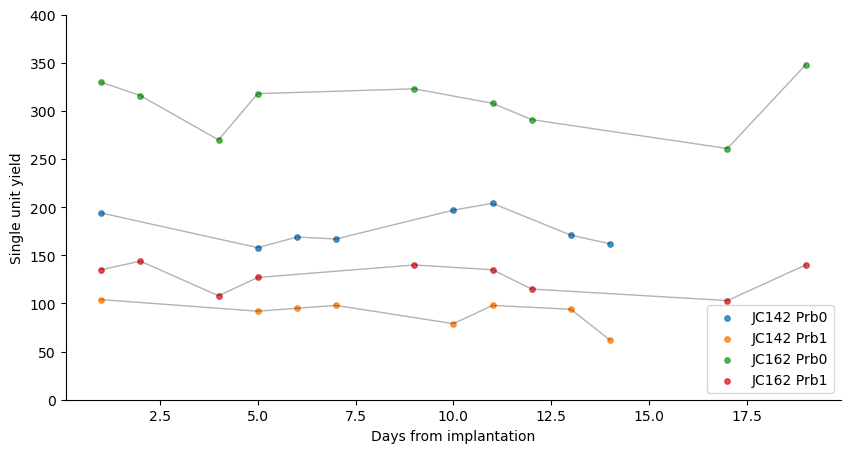

In [5]:
dat = create_unit_count_dataframe(FREELY_MOVING_SUBJECTS,KS_PARAM_SET,UNIT_CRITERIA_SET)

fig,ax = plt.subplots(figsize=(10,5))
for (sub,p_num),p_data in dat.groupby(['subject_name','probe_num']):
    plt.plot(p_data.days_from_implant, p_data.sua, color='black',linewidth=1, alpha=.3)
    plt.scatter(p_data.days_from_implant, p_data.sua, label=f'{sub} Prb{p_num}', s=15, alpha=.8)

plt.ylim((0,400))
plt.xlabel('Days from implantation')
plt.ylabel('Single unit yield')
plt.legend()
plt.gca().spines[['right', 'top']].set_visible(False)
plt.savefig(SAVEPATH / 'single_unit_stability_freely_moving.pdf', format='pdf', dpi=300)
plt.show()